<a href="https://colab.research.google.com/github/deiivid10/METODOS-NUMERICOS/blob/main/COMPARACION%20DE%20INTERPOLACIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AQUI GRAFICAMOS LA FUNCION SIMBOLICA CON LOS NODOS NECESARIOS
F(x) = 1/1+25x**2     
[-1,1]



1/(25*x**2 + 1)


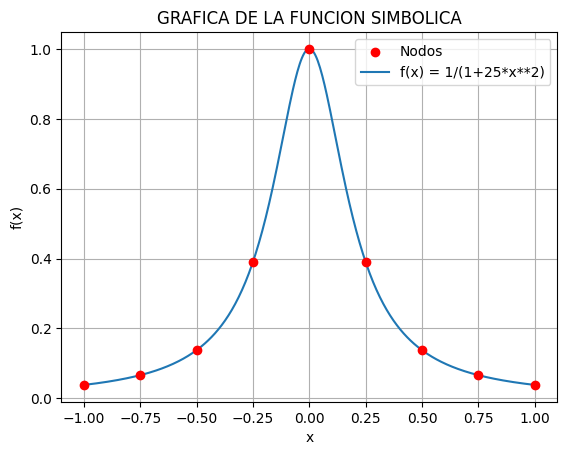

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp

x = sp.Symbol('x')
f =  (1+25*x**2)**-1
print(f)

f_num = sp.lambdify(x, f, modules=['numpy'])

x_vals = np.linspace(-1, 1, 400)
y_vals = f_num(x_vals)

nodos_x = np.linspace(-1, 1, 9)
nodos_y = f_num(nodos_x)

plt.scatter(nodos_x, nodos_y, color='red', label='Nodos', zorder=5)
plt.plot(x_vals, y_vals, label= 'f(x) = 1/(1+25*x**2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('GRAFICA DE LA FUNCION SIMBOLICA')
plt.grid(True)
plt.legend()
plt.show()




#AQUI DEFINIMOS LA FUNCION SIMBOLICA Y VEMOS COMO SE COMPARTA CADA GRAFICA DE LA GRANGE , NEWTON HACIA ATRAS Y HERMITE CON LA FUNCION SIMBOLICA, APLICANDO SU LOGARITMO PARA CADA UNO CON EL EJEMPLO DADO , LOS NODOS NECESARIOS Y AL FINAL LAS COMPARAMOS CADA UNA CON SU GRAFICA RESPECTIVA

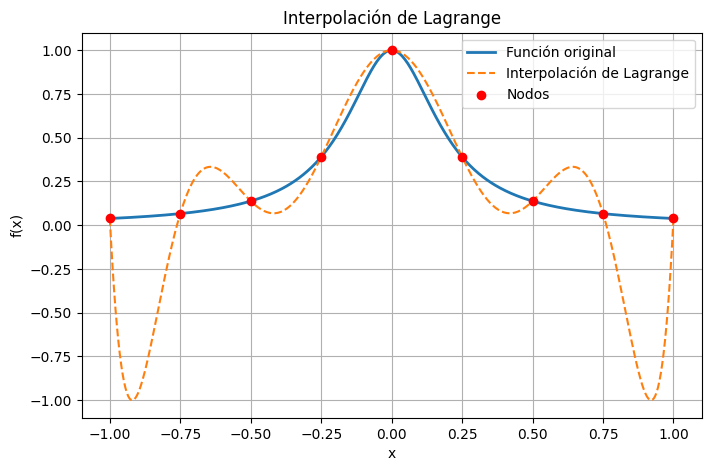

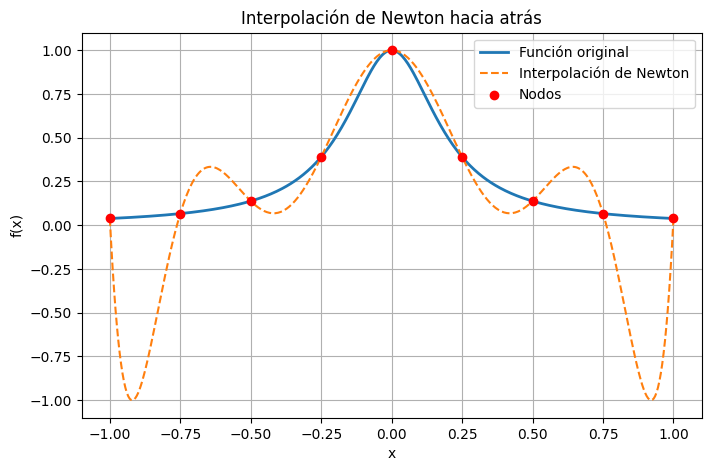

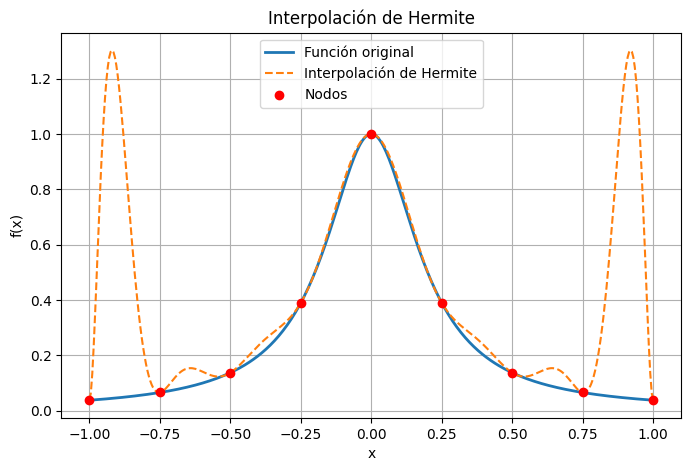

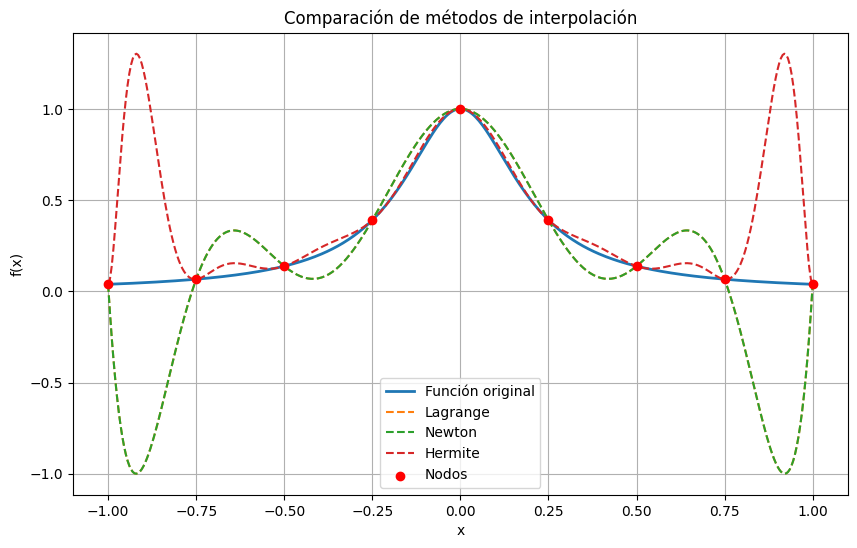

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definición simbólica de la función
x = sp.Symbol('x')
f = (1 + 25 * x**2)**-1
f_num = sp.lambdify(x, f, modules=['numpy'])

# Dominio de evaluación
x_vals = np.linspace(-1, 1, 400)
y_vals = f_num(x_vals)

# Nodos de interpolación
n = 9
nodos_x = np.linspace(-1, 1, n)
nodos_y = f_num(nodos_x)

# Polinomio de Lagrange
def lagrange_interpolacion(xi, yi):
    x = sp.Symbol('x')
    n = len(xi)
    P = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - xi[j]) / (xi[i] - xi[j])
        P += yi[i] * L
    return sp.simplify(P)

P_lagrange = lagrange_interpolacion(nodos_x, nodos_y)
P_lagrange_num = sp.lambdify(x, P_lagrange, modules=['numpy'])
y_lagrange = P_lagrange_num(x_vals)

# Polinomio de Newton hacia atrás
def diferencias_divididas(xi, yi):
    n = len(xi)
    tabla = np.zeros((n, n))
    tabla[:, 0] = yi
    for j in range(1, n):
        for i in range(j, n):
            tabla[i, j] = (tabla[i, j - 1] - tabla[i - 1, j - 1]) / (xi[i] - xi[i - j])
    return tabla

def newton_hacia_atras(xi, yi):
    x = sp.Symbol('x')
    tabla = diferencias_divididas(xi, yi)
    n = len(xi)
    P = tabla[n - 1, 0]
    prod = 1
    for k in range(1, n):
        prod *= (x - xi[n - k])
        P += tabla[n - 1, k] * prod
    return sp.simplify(P)

P_newton = newton_hacia_atras(nodos_x, nodos_y)
P_newton_num = sp.lambdify(x, P_newton, modules=['numpy'])
y_newton = P_newton_num(x_vals)

# Polinomio de Hermite
def hermite_interpolacion(xi, yi, dyi):
    n = len(xi)
    z = np.zeros(2 * n)
    Q = np.zeros((2 * n, 2 * n))

    for i in range(n):
        z[2 * i] = z[2 * i + 1] = xi[i]
        Q[2 * i][0] = Q[2 * i + 1][0] = yi[i]
        Q[2 * i + 1][1] = dyi[i]
        if i != 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])

    for j in range(2, 2 * n):
        for i in range(j, 2 * n):
            Q[i][j] = (Q[i][j - 1] - Q[i - 1][j - 1]) / (z[i] - z[i - j])

    x_sym = sp.Symbol('x')
    H = Q[0][0]
    prod = 1
    for i in range(1, 2 * n):
        prod *= (x_sym - z[i - 1])
        H += Q[i][i] * prod
    return sp.simplify(H)

dy_numericas = np.gradient(nodos_y, nodos_x)
P_hermite = hermite_interpolacion(nodos_x, nodos_y, dy_numericas)
P_hermite_num = sp.lambdify(x, P_hermite, modules=['numpy'])
y_hermite = P_hermite_num(x_vals)

### GRAFICACIÓN INDIVIDUAL ###
# Lagrange
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='Función original', linewidth=2)
plt.plot(x_vals, y_lagrange, '--', label='Interpolación de Lagrange')
plt.scatter(nodos_x, nodos_y, color='red', label='Nodos', zorder=5)
plt.title('Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Newton
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='Función original', linewidth=2)
plt.plot(x_vals, y_newton, '--', label='Interpolación de Newton')
plt.scatter(nodos_x, nodos_y, color='red', label='Nodos', zorder=5)
plt.title('Interpolación de Newton hacia atrás')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Hermite
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='Función original', linewidth=2)
plt.plot(x_vals, y_hermite, '--', label='Interpolación de Hermite')
plt.scatter(nodos_x, nodos_y, color='red', label='Nodos', zorder=5)
plt.title('Interpolación de Hermite')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

### GRAFICACIÓN COMPARATIVA ###
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Función original', linewidth=2)
plt.plot(x_vals, y_lagrange, '--', label='Lagrange')
plt.plot(x_vals, y_newton, '--', label='Newton')
plt.plot(x_vals, y_hermite, '--', label='Hermite')
plt.scatter(nodos_x, nodos_y, color='red', label='Nodos', zorder=5)
plt.title('Comparación de métodos de interpolación')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()
